In [1]:
import numpy as np
import pandas as pd

In [2]:
phenotypes_data=pd.read_csv('agrocodehub_data/phenotypes.tsv',sep='\t')
vegetation_data=pd.read_csv('agrocodehub_data/vegetation.tsv',sep='\t')

In [3]:
phenotypes_data.head()

,sample,2015,2016,2017,2019,2020,2021,2022,2023
0,PS000196,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN
1,PS000195,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
2,PS000121,NaN,NaN,101.0,107.0,NaN,NaN,NaN,NaN
3,PS000126,NaN,NaN,NaN,115.0,112.0,NaN,NaN,NaN
4,PS000123,NaN,NaN,NaN,113.0,102.0,79.0,NaN,NaN


In [4]:
vegetation_data.head()

,sample,vegetation
0,PS000196,100
1,PS000195,103
2,PS000121,104
3,PS000126,106
4,PS000123,101


In [5]:
phenotypes_data

,sample,2015,2016,2017,2019,2020,2021,2022,2023
0,PS000196,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN
1,PS000195,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
2,PS000121,NaN,NaN,101.0,107.0,NaN,NaN,NaN,NaN
3,PS000126,NaN,NaN,NaN,115.0,112.0,NaN,NaN,NaN
4,PS000123,NaN,NaN,NaN,113.0,102.0,79.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
94,PS000370,NaN,NaN,NaN,NaN,NaN,128.0,85.0,NaN
95,PS000184,101.0,98.0,95.0,95.0,79.0,95.0,NaN,NaN
96,PS000169,122.0,NaN,121.0,120.0,151.0,NaN,NaN,NaN
97,PS000053,NaN,NaN,105.0,98.0,NaN,NaN,NaN,NaN


In [6]:
vegetation_data

,sample,vegetation
0,PS000196,100
1,PS000195,103
2,PS000121,104
3,PS000126,106
4,PS000123,101
...,...,...
94,PS000370,118
95,PS000184,102
96,PS000169,114
97,PS000053,119


In [7]:
set(vegetation_data["sample"].unique()) - set(phenotypes_data["sample"].unique())

set()

In [8]:
data = pd.merge(phenotypes_data, vegetation_data, on=["sample"])
data

,sample,2015,2016,2017,2019,2020,2021,2022,2023,vegetation
0,PS000196,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,100
1,PS000195,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,103
2,PS000121,NaN,NaN,101.0,107.0,NaN,NaN,NaN,NaN,104
3,PS000126,NaN,NaN,NaN,115.0,112.0,NaN,NaN,NaN,106
4,PS000123,NaN,NaN,NaN,113.0,102.0,79.0,NaN,NaN,101
...,...,...,...,...,...,...,...,...,...,...
94,PS000370,NaN,NaN,NaN,NaN,NaN,128.0,85.0,NaN,118
95,PS000184,101.0,98.0,95.0,95.0,79.0,95.0,NaN,NaN,102
96,PS000169,122.0,NaN,121.0,120.0,151.0,NaN,NaN,NaN,114
97,PS000053,NaN,NaN,105.0,98.0,NaN,NaN,NaN,NaN,119


In [9]:
data.describe()

,2015,2016,2017,2019,2020,2021,2022,2023,vegetation
count,43.000000,34.000000,39.000000,81.000000,67.000000,61.000000,19.000000,15.000000,99.000000
mean,106.790698,99.911765,100.615385,101.679012,105.164179,108.721311,104.368421,104.533333,107.717172
std,15.905312,14.924797,13.548384,16.977800,17.716280,14.740117,10.414789,14.730273,5.562338
min,71.000000,69.000000,73.000000,72.000000,59.000000,67.000000,84.000000,69.000000,93.000000
25%,99.500000,92.000000,94.500000,93.000000,94.500000,102.000000,99.000000,97.500000,104.000000
50%,108.000000,102.000000,102.000000,99.000000,106.000000,108.000000,106.000000,107.000000,108.000000
75%,116.500000,112.000000,106.500000,107.000000,116.000000,119.000000,113.500000,113.500000,112.000000
max,140.000000,123.000000,124.000000,180.000000,151.000000,141.000000,116.000000,130.000000,127.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sample      99 non-null     object 
 1   2015        43 non-null     float64
 2   2016        34 non-null     float64
 3   2017        39 non-null     float64
 4   2019        81 non-null     float64
 5   2020        67 non-null     float64
 6   2021        61 non-null     float64
 7   2022        19 non-null     float64
 8   2023        15 non-null     float64
 9   vegetation  99 non-null     int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 8.5+ KB


In [11]:
from bioinfokit.analys import marker

# id is for column name with chromosome identifier in VCF file
vcf_iter = marker.vcfreader(file='agrocodehub_data/genotypes.vcf', id='#CHROM')

header_list = []
info_lines_list = []
marker_lines_list = []

# read vcf file
for record in vcf_iter:

    # get info lines, header, and variant records
    headers, info_lines, marker_lines = record

    header_list.append(headers)
    info_lines_list.append(info_lines)
    marker_lines_list.append(marker_lines)

In [12]:
header_list = header_list[0]
info_lines_list = info_lines_list[0]

In [13]:
info_lines_list[-24:]

['##contig=<ID=KZ848287,length=1002>',
 '##ALT=<ID=*,Description="Represents allele(s) other than observed.">',
 '##INFO=<ID=INDEL,Number=0,Type=Flag,Description="Indicates that the variant is an INDEL.">',
 '##INFO=<ID=IDV,Number=1,Type=Integer,Description="Maximum number of raw reads supporting an indel">',
 '##INFO=<ID=IMF,Number=1,Type=Float,Description="Maximum fraction of raw reads supporting an indel">',
 '##INFO=<ID=DP,Number=1,Type=Integer,Description="Raw read depth">',
 '##INFO=<ID=VDB,Number=1,Type=Float,Description="Variant Distance Bias for filtering splice-site artefacts in RNA-seq data (bigger is better)",Version="3">',
 '##INFO=<ID=RPB,Number=1,Type=Float,Description="Mann-Whitney U test of Read Position Bias (bigger is better)">',
 '##INFO=<ID=MQB,Number=1,Type=Float,Description="Mann-Whitney U test of Mapping Quality Bias (bigger is better)">',
 '##INFO=<ID=BQB,Number=1,Type=Float,Description="Mann-Whitney U test of Base Quality Bias (bigger is better)">',
 '##INFO=<

In [14]:
# Создание словаря
contig_dict = {}

for contig in info_lines_list[3:-23]:
    # Извлечение ID и length
    id_part = contig.split(',')[0].split('=')[2]  # Получаем ID
    length_part = contig.split(',')[1].split('=')[1][:-1]  # Получаем length
    contig_dict[id_part] = int(length_part)  # Добавляем в словарь

In [15]:
genotypes_data = pd.DataFrame(data=marker_lines_list, columns=header_list)
genotypes_data

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,PS000026,...,PS000433,PS000436,PS000437,PS000440,PS000441,PS000444,PS000566,PS000567,PS000568,PS000570
0,1,40481,.,G,A,132,.,.,GT:PL:DP,"0/0:0,3,39:1",...,"0/0:0,3,48:1","./.:0,0,0:0","0/0:0,3,60:1","0/0:0,3,60:1","0/0:0,9,151:3","0/0:0,27,220:9","0/0:0,66,250:22","0/0:0,47,247:20","0/0:0,99,251:33","0/0:0,60,250:20"
1,1,40522,.,C,T,999,.,.,GT:PL:DP,"0/0:0,3,40:1",...,"0/0:0,3,25:1","./.:0,0,0:0","0/0:0,3,37:1","0/0:0,3,37:1","0/0:0,9,92:3","0/0:0,27,170:9","0/0:0,66,196:22","0/0:0,47,193:20","0/0:0,99,199:33","0/0:0,57,195:19"
2,1,111641,.,G,C,999,.,.,GT:PL:DP,"0/1:39,3,0:1",...,"./.:0,0,0:0","0/1:48,3,0:1","0/1:255,0,24:12","0/1:191,0,42:6","0/1:137,0,96:5","0/0:0,15,212:5","0/1:255,0,223:56","0/0:0,21,254:7","0/1:255,0,194:37","0/0:0,39,255:13"
3,1,111675,.,G,C,999,.,.,GT:PL:DP,"0/1:49,3,0:1",...,"./.:0,0,0:0","0/1:60,3,0:1","0/1:255,0,24:12","0/1:197,0,42:6","0/1:137,0,96:5","0/0:0,15,212:5","0/1:255,0,221:56","0/0:0,21,254:7","0/1:255,0,229:38","0/0:0,39,255:13"
4,1,111688,.,T,C,999,.,.,GT:PL:DP,"0/1:40,3,0:1",...,"./.:0,0,0:0","0/1:60,3,0:1","0/1:255,0,24:12","0/1:197,0,42:6","0/1:137,0,96:5","0/0:0,15,212:5","0/1:255,0,223:56","0/0:0,21,254:7","0/1:255,0,226:38","0/0:0,39,255:13"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38935,KZ848124,2425,.,T,A,999,.,.,GT:PL:DP,"0/1:32,0,123:7",...,"0/1:55,0,151:14","0/1:103,0,131:12","0/1:166,0,151:42","0/1:100,0,129:13","0/1:166,0,146:34","0/0:0,33,41:11","0/1:153,0,87:37","0/1:165,0,143:80","0/1:158,0,163:51","0/1:161,0,191:83"
38936,KZ848124,2494,.,T,C,999,.,.,GT:PL:DP,"0/1:35,0,159:7",...,"0/1:58,0,252:14","0/1:110,0,205:12","0/1:232,0,255:42","0/1:127,0,193:12","0/1:178,0,255:35","./.:0,0,0:0","0/1:175,0,255:103","0/1:222,0,255:121","0/1:132,0,255:76","0/1:176,0,255:134"
38937,KZ848124,2502,.,T,A,999,.,.,GT:PL:DP,"0/0:0,21,150:7",...,"0/0:0,42,255:14","0/1:51,0,205:12","0/0:0,126,255:42","0/1:59,0,207:12","0/0:0,105,255:35","0/0:0,6,8:2","0/0:0,255,255:103","0/0:0,255,255:122","0/0:0,32,255:77","0/0:0,255,255:134"
38938,KZ848124,2515,.,G,T,999,.,.,GT:PL:DP,"0/0:0,21,149:7",...,"0/1:27,0,239:14","0/0:0,36,255:12","0/0:0,32,255:42","0/1:59,0,209:12","0/0:0,57,255:35","0/0:0,6,9:2","0/0:0,54,255:103","0/1:41,0,250:122","0/0:0,14,255:76","0/1:56,0,255:134"


In [16]:
genotypes_data.drop(columns=["ID", "FILTER", "INFO", "FORMAT"], inplace=True)

In [17]:
genotypes_data.iloc[:, :5].describe()

,#CHROM,POS,REF,ALT,QUAL
count,38940,38940,38940,38940,38940
unique,110,38897,1429,1489,1019
top,18,10146005,G,T,999
freq,2740,3,9554,10150,35337


In [18]:
genotypes_data.head()

,#CHROM,POS,REF,ALT,QUAL,PS000026,PS000027,PS000028,PS000031,PS000033,...,PS000433,PS000436,PS000437,PS000440,PS000441,PS000444,PS000566,PS000567,PS000568,PS000570
0,1,40481,G,A,132,"0/0:0,3,39:1","0/0:0,9,89:3","0/0:3,0,120:8","0/0:0,39,203:13","0/1:10,0,115:11",...,"0/0:0,3,48:1","./.:0,0,0:0","0/0:0,3,60:1","0/0:0,3,60:1","0/0:0,9,151:3","0/0:0,27,220:9","0/0:0,66,250:22","0/0:0,47,247:20","0/0:0,99,251:33","0/0:0,60,250:20"
1,1,40522,C,T,999,"0/0:0,3,40:1","0/1:21,0,85:4","0/1:115,0,172:22","0/0:0,57,212:19","0/1:149,0,172:31",...,"0/0:0,3,25:1","./.:0,0,0:0","0/0:0,3,37:1","0/0:0,3,37:1","0/0:0,9,92:3","0/0:0,27,170:9","0/0:0,66,196:22","0/0:0,47,193:20","0/0:0,99,199:33","0/0:0,57,195:19"
2,1,111641,G,C,999,"0/1:39,3,0:1","1/1:122,12,0:4","0/1:52,0,123:7","0/0:0,24,176:8","0/0:0,9,97:3",...,"./.:0,0,0:0","0/1:48,3,0:1","0/1:255,0,24:12","0/1:191,0,42:6","0/1:137,0,96:5","0/0:0,15,212:5","0/1:255,0,223:56","0/0:0,21,254:7","0/1:255,0,194:37","0/0:0,39,255:13"
3,1,111675,G,C,999,"0/1:49,3,0:1","1/1:150,12,0:4","0/1:64,0,186:7","0/0:0,24,255:8","0/0:0,9,151:3",...,"./.:0,0,0:0","0/1:60,3,0:1","0/1:255,0,24:12","0/1:197,0,42:6","0/1:137,0,96:5","0/0:0,15,212:5","0/1:255,0,221:56","0/0:0,21,254:7","0/1:255,0,229:38","0/0:0,39,255:13"
4,1,111688,T,C,999,"0/1:40,3,0:1","1/1:118,12,0:4","0/1:68,0,195:7","0/0:0,24,223:8","0/0:0,9,131:3",...,"./.:0,0,0:0","0/1:60,3,0:1","0/1:255,0,24:12","0/1:197,0,42:6","0/1:137,0,96:5","0/0:0,15,212:5","0/1:255,0,223:56","0/0:0,21,254:7","0/1:255,0,226:38","0/0:0,39,255:13"


In [19]:
genotypes_data.to_csv("genotypes_processed.csv", index=False)

In [20]:
genotypes_data["PS000433"].str.split(":").str[0].unique()

array(['0/0', './.', '0/1', '1/1', '1/2', '0/2', '1/3', '2/2', '0/3'],
      dtype=object)

In [21]:
genotypes_data[genotypes_data["QUAL"].astype(float) < 100]

,#CHROM,POS,REF,ALT,QUAL,PS000026,PS000027,PS000028,PS000031,PS000033,...,PS000433,PS000436,PS000437,PS000440,PS000441,PS000444,PS000566,PS000567,PS000568,PS000570
149,1,3599872,CAAAAAAAA,CAAAAAAAAA,80,"0/0:0,3,12:1","0/0:0,24,52:8","0/0:0,114,62:38","0/0:0,78,68:27","1/1:36,23,0:19",...,"0/0:0,12,27:4","./.:0,0,0:0","0/0:0,96,56:32","0/0:0,18,36:6","0/0:0,90,57:30","0/0:0,187,47:62","./.:0,0,0:0","0/0:0,175,48:58","0/0:24,24,11:128","0/0:0,255,42:114"
298,1,8074821,CTCT,C,39.1211,"0/0:0,6,47:2","0/0:0,48,200:16","0/0:0,78,227:26","0/0:3,0,86:20","0/0:0,78,254:26",...,"0/0:0,27,76:9","0/0:0,6,35:2","0/0:0,7,35:8","0/0:0,33,163:11","0/0:0,60,152:20","0/1:9,0,50:8","0/0:0,111,159:38","0/0:0,99,203:34","0/0:0,102,215:34","0/0:0,22,113:17"
317,1,11292121,T,A,51,"./.:0,0,0:0","0/0:4,0,28:4","0/0:0,24,96:8","0/0:0,5,56:7","0/0:0,21,106:7",...,"./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","0/0:0,36,182:12","0/0:0,45,187:15","0/0:0,36,182:12","0/0:0,27,163:9","0/0:0,24,159:8"
326,1,13209987,A,C,91,"0/0:0,6,7:2","0/0:0,51,9:17","0/0:0,33,12:11","./.:0,0,0:0","0/0:0,75,7:25",...,"0/0:0,9,9:3","0/0:0,3,4:1","0/0:0,33,12:11","0/0:0,6,7:2","0/0:0,12,11:4","0/0:0,9,9:3","0/0:0,72,7:24","0/0:0,78,7:26","./.:0,0,0:0","./.:0,0,0:0"
442,1,18327660,G,A,50,"./.:0,0,0:0","./.:0,0,0:0","0/1:12,3,0:1","0/0:0,3,40:1","0/1:2,0,90:10",...,"./.:0,0,0:0","0/0:0,3,60:1","0/0:0,3,60:1","0/0:0,3,60:1","0/0:0,3,60:1","0/0:0,12,176:4","0/0:0,15,212:5","0/0:0,18,205:6","0/0:0,15,255:11","0/0:0,24,255:8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38346,KZ847136,567123,C,T,99,"0/1:0,3,4:1","0/1:0,3,9:1","0/0:0,6,7:2","0/0:0,18,20:6","0/0:0,5,6:11",...,"./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","0/1:0,3,4:1","0/1:0,1,7:2","0/1:0,3,9:1","0/1:0,3,4:1","0/1:0,3,4:1","0/0:0,15,58:5","0/1:0,3,4:1"
38359,KZ847139,286923,A,G,39.7275,"0/1:0,1,0:2","0/0:0,9,9:3","1/1:7,30,0:17","1/1:8,66,0:22","0/0:0,75,7:25",...,"1/1:6,32,0:21","1/1:1,6,0:16","1/1:1,23,0:84","1/1:2,32,0:58","1/1:3,43,0:100","0/0:0,81,5:32","1/1:9,54,0:18","0/0:0,105,6:35","0/0:0,216,9:78","1/1:1,17,0:69"
38670,KZ847789,1062,A,C,98,"0/0:0,6,60:2","0/1:8,0,40:8","0/0:0,23,102:25","0/0:0,35,117:19","0/0:0,23,161:21",...,"0/0:0,3,123:9","0/0:0,5,22:4","0/0:0,5,255:28","0/0:0,4,208:13","0/0:0,29,255:42","0/0:0,71,255:150","0/0:0,65,255:54","0/0:0,79,255:61","0/0:0,68,255:39","0/0:0,171,255:100"
38836,KZ847539,1292,C,G,43.6996,"1/1:9,9,0:3","0/1:0,1,0:2","1/1:9,9,0:3","0/0:0,4,2:7","0/1:0,3,3:3",...,"./.:0,0,0:0","0/1:0,3,4:1","0/1:0,3,3:3","1/1:4,3,0:1","1/1:4,3,0:1","./.:0,0,0:0","./.:0,0,0:0","1/1:7,6,0:2","1/1:10,48,0:16","1/1:8,16,0:11"


In [52]:
genotypes_data_exp = genotypes_data.copy()
ids1s = []
ids2s = []
for column in genotypes_data_exp.columns[5:]:
    split_data = genotypes_data_exp[column].str.split(":", expand=True)

    ids1 = split_data[2].astype(int)
    ids1s.append(ids1.to_list())

    second_values = split_data[1].str.split(",").apply(lambda x: [int(i) for i in x] if isinstance(x, list) else [])
        
    second_largest = second_values.apply(lambda x: sorted(x)[-2] if len(x) > 1 else np.nan)
    ids2s.append(second_largest) # < min_diff

In [29]:
import matplotlib.pyplot as plt

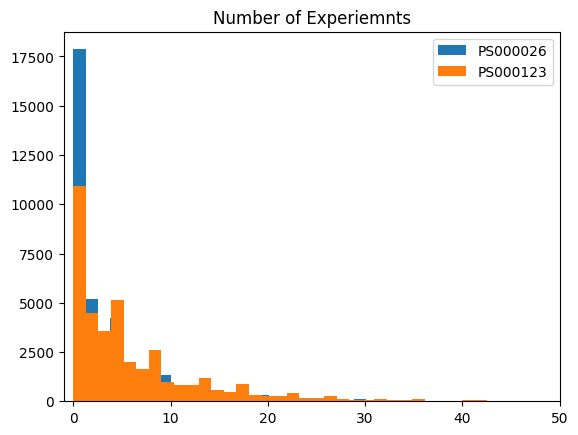

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Number of Experiemnts")
plt.hist(np.array(ids1s)[0], bins=200,  label=genotypes_data_exp.columns[5:][0])
plt.hist(np.array(ids1s)[50], bins=200, label=genotypes_data_exp.columns[5:][50])
plt.xlim(-1, 50)
plt.legend()

In [ ]:
plt.title("Number of Experiemnts")
plt.hist(np.array(ids1s)[0], bins=200,  label=genotypes_data_exp.columns[5:][0])
plt.hist(np.array(ids1s)[50], bins=200, label=genotypes_data_exp.columns[5:][50])
plt.xlim(-1, 50)
plt.legend()